In [1]:
#This is the works for Udacity Self-driving-car-nd Term1 Project 3.
%matplotlib inline
import os, sys, random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Print iterations progress
def print_progress(iteration, total):
    """
    Call in a loop to create terminal progress bar
    
    Parameters
    ----------
        
    iteration : 
                Current iteration (Int)
    total     : 
                Total iterations (Int)
    """
    str_format = "{0:.0f}"
    percents = str_format.format(100 * (iteration / float(total)))
    filled_length = int(round(100 * iteration / float(total)))
    bar = '█' * filled_length + '-' * (100 - filled_length)

    sys.stdout.write('\r |%s| %s%%' % (bar, percents)),

    if iteration == total:
        sys.stdout.write('\n')
    sys.stdout.flush()

### Dataset

In [3]:
Folder_path = "./dataset/behavioral-cloning/train_data/"
Img_path = Folder_path + "IMG/"
df = pd.read_csv(Folder_path + "driving_log.csv")

df = df.drop('Unnamed: 0', 1)

In [4]:
df

,center,left,right,steer,gas,brake,speed
0,/home/vmadmin/Dataset/behavioral-cloning/train...,/home/vmadmin/Dataset/behavioral-cloning/train...,/home/vmadmin/Dataset/behavioral-cloning/train...,-0.182353,1,0,30.06925
1,/home/vmadmin/Dataset/behavioral-cloning/train...,/home/vmadmin/Dataset/behavioral-cloning/train...,/home/vmadmin/Dataset/behavioral-cloning/train...,-0.205882,1,0,30.18475
2,/home/vmadmin/Dataset/behavioral-cloning/train...,/home/vmadmin/Dataset/behavioral-cloning/train...,/home/vmadmin/Dataset/behavioral-cloning/train...,-0.223529,1,0,30.18512
3,/home/vmadmin/Dataset/behavioral-cloning/train...,/home/vmadmin/Dataset/behavioral-cloning/train...,/home/vmadmin/Dataset/behavioral-cloning/train...,-0.223529,1,0,30.18708
4,/home/vmadmin/Dataset/behavioral-cloning/train...,/home/vmadmin/Dataset/behavioral-cloning/train...,/home/vmadmin/Dataset/behavioral-cloning/train...,-0.223529,1,0,30.18811
5,/home/vmadmin/Dataset/behavioral-cloning/train...,/home/vmadmin/Dataset/behavioral-cloning/train...,/home/vmadmin/Dataset/behavioral-cloning/train...,-0.117647,1,0,30.19190
6,/home/vmadmin/Dataset/behavioral-cloning/train...,/home/vmadmin/Dataset/behavioral-cloning/train...,/home/vmadmin/Dataset/behavioral-cloning/train...,-0.017647,1,0,30.18985
7,/home/vmadmin/Dataset/behavioral-cloning/train...,/home/vmadmin/Dataset/behavioral-cloning/train...,/home/vmadmin/Dataset/behavioral-cloning/train...,-0.017647,1,0,30.19038
8,/home/vmadmin/Dataset/behavioral-cloning/train...,/home/vmadmin/Dataset/behavioral-cloning/train...,/home/vmadmin/Dataset/behavioral-cloning/train...,-0.017647,1,0,30.19047
9,/home/vmadmin/Dataset/behavioral-cloning/train...,/home/vmadmin/Dataset/behavioral-cloning/train...,/home/vmadmin/Dataset/behavioral-cloning/train...,-0.017647,1,0,30.19038


In [5]:
num_examples = len(df)
print("Number of examplese : {}".format(num_examples))

Number of examplese : 50243


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd71d47ef28>]], dtype=object)

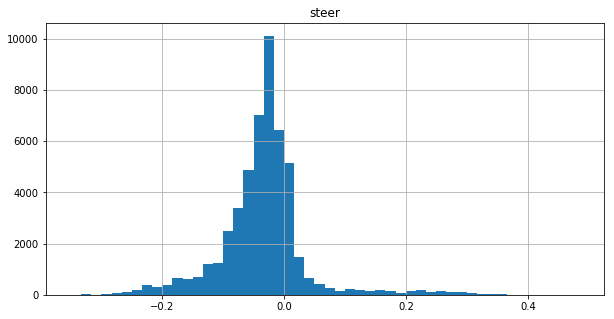

In [6]:
# Dataset distribution plot
df.hist(column=['steer'], bins=50, figsize=(10,5))

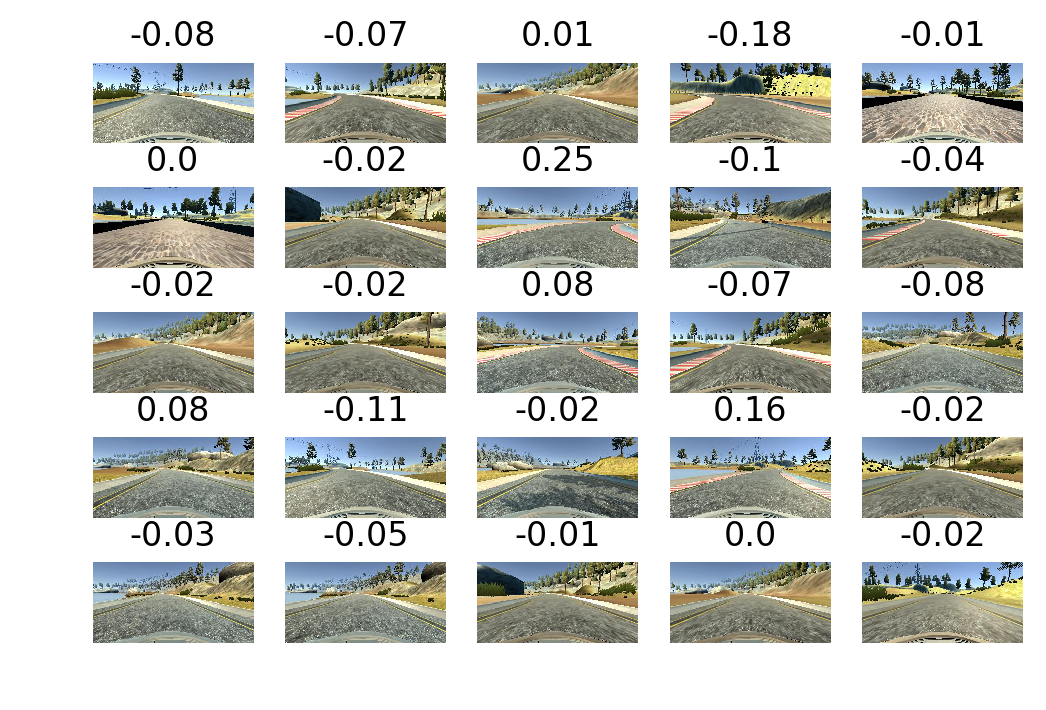

In [7]:
# Sample plot
ran_idx = random.sample(range(0, num_examples), 25)

plt.figure(dpi=200)
test_imgs = df.loc[ran_idx].center
test_steers = df.loc[ran_idx].steer
for i, (test_img, test_steer) in enumerate(zip(test_imgs, test_steers)):
    plt.subplot(5,5,i+1), plt.imshow(plt.imread(test_img)), plt.axis('off'), plt.title(round(test_steer,2))    

### Data Augmentation

In [8]:
import random
import os, sys
import csv
from skimage.transform import rotate, warp, ProjectiveTransform, AffineTransform
from skimage.exposure import equalize_adapthist
from scipy.misc import imresize

In [9]:
def using_left_center_right_cam(df, steer_offset=0.25):
    all_images = []
    all_steers = []
    
    for i in range(len(df)):
        center_img, center_str = plt.imread(df.loc[i].center), df.loc[i].steer
        left_img, left_str = plt.imread(df.loc[i].left), df.loc[i].steer + steer_offset
        right_img, right_str = plt.imread(df.loc[i].right), df.loc[i].steer - steer_offset

        all_images.append(left_img)
        all_images.append(center_img)
        all_images.append(right_img)

        all_steers.append(left_str)
        all_steers.append(center_str)
        all_steers.append(right_str)
        
        print_progress(i+1, len(df))
           
    return np.asarray(all_images, dtype=np.uint8), np.asarray(all_steers, dtype=np.float32)

In [10]:
test_imgs, test_strs = using_left_center_right_cam(df[0:10])

 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100%


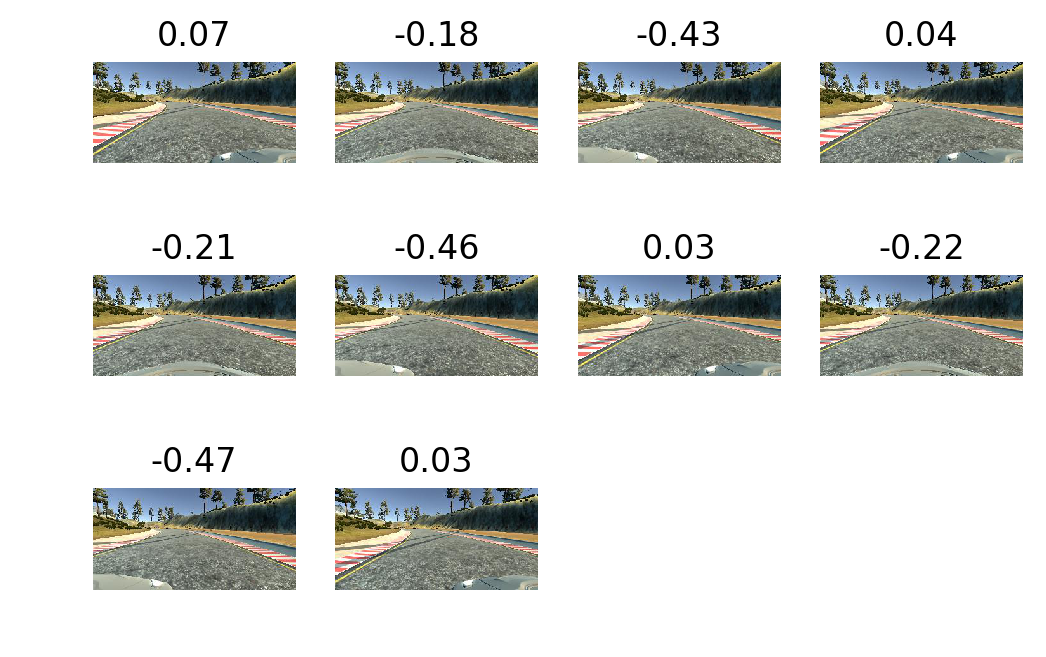

In [11]:
plt.figure(dpi=200)
for i in range(10):
    plt.subplot(3,4,i+1),plt.imshow(test_imgs[i]), plt.title(round(test_strs[i],2)),plt.axis('off')

In [12]:
def random_translate(X, steer, intensity=1):
    delta = 15.* intensity
    rand_delta = random.uniform(-delta, delta)
    translate_matrix = AffineTransform(translation=(0, rand_delta))
    X = warp(X,translate_matrix)
    steer = steer
    return X, steer

(<matplotlib.axes._subplots.AxesSubplot at 0x7fd71ba0c668>,
 (-0.5, 319.5, 159.5, -0.5))

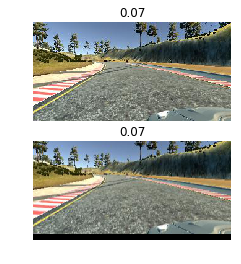

In [13]:
#test
test_rt_img, test_rt_str = random_translate(test_imgs[0], test_strs[0])
plt.subplot(2,1,1), plt.imshow(test_imgs[0]), plt.title(round(test_strs[0],2)), plt.axis('off')
plt.subplot(2,1,2), plt.imshow(test_rt_img), plt.title(round(test_rt_str,2)), plt.axis('off')


In [14]:
def image_flip(X, steer):
    img_fliped = np.fliplr(X)
    str_fliped = -steer
    return img_fliped, str_fliped

(<matplotlib.axes._subplots.AxesSubplot at 0x7fd71bdca630>,
 (-0.5, 319.5, 159.5, -0.5),
 <matplotlib.text.Text at 0x7fd71bd70518>)

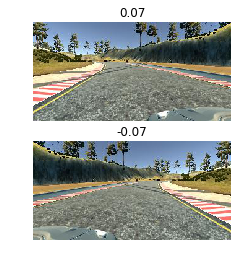

In [15]:
#test
test_fl_img, test_fl_str = image_flip(test_imgs[0], test_strs[0])
plt.subplot(2,1,1), plt.imshow(test_imgs[0]), plt.axis('off'), plt.title(round(test_strs[0],2))
plt.subplot(2,1,2), plt.imshow(test_fl_img), plt.axis('off'), plt.title(round(test_fl_str,2))

In [16]:
def transform_images(X, y):
    X, y = random_translate(X, y)
    X, y = image_flip(X, y)
    
    return X, y    

In [17]:
def get_transform_images(Xs, ys, n_each=10):
    X_arr = []
    y_arr = []
    
    for i, (x, y) in enumerate(zip(Xs, ys)):
        for _ in range(n_each):
            img_trf, label_trf = transform_images(x, y)
            X_arr.append(img_trf)
            y_arr.append(label_trf)
            
        print_progress(i+1, Xs.shape[0])
    
    X_arr = np.asarray(X_arr, dtype=np.uint8)
    y_arr = np.asarray(y_arr, dtype=np.float32)
    
    return X_arr, y_arr

In [18]:
def preprocess_image(X):
    X = (X / 255.).astype(np.float32)
    X = equalize_adapthist(X)
    
    return X

In [19]:
samples = []
with open(Folder_path + "driving_log.csv") as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        samples.append(line)


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
train_samples, validation_samples = train_test_split(samples, test_size=0.2)

In [21]:
def generator(df, n_each=10, batch_size=128):
    num_samples = len(df)
    while True:
        #shuffle(samples)
        for offset in range(1, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]
            
            images = []
            angles = []
            str_offset = 0.25
            
            for batch_sample in batch_samples:
                #Using left,right cam
                three_imgs = []
                three_angs = []
                center_name = batch_sample[1]
                left_name = batch_sample[2]
                right_name = batch_sample[3]
                
                center_str = float(batch_sample[4])
                left_str = center_str + str_offset
                right_str = center_str - str_offset
                
                #center_img = preprocess_image(plt.imread(center_name))
                #left_img = preprocess_image(plt.imread(left_name))
                #right_img = preprocess_image(plt.imread(right_name))
                center_img = imresize(plt.imread(center_name), (32,128,3))
                left_img = imresize(plt.imread(left_name), (32,128,3))
                right_img = imresize(plt.imread(right_name), (32,128,3))
                
                three_imgs.append(left_img)
                three_imgs.append(center_img)
                three_imgs.append(right_img)
                
                three_angs.append(left_str)
                three_angs.append(center_str)
                three_angs.append(right_str)
                
                #Trasnform images
                '''
                for i, (x,y) in enumerate(zip(three_imgs, three_angs)):
                    for _ in range(n_each):
                        img_trf, angle_trf = transform_images(x, y)
                        images.append(img_trf)
                        angles.append(angle_trf)
                '''
                
                images = three_imgs
                angles = three_angs
                
                
            X_train = np.array(images)
            y_train = np.array(angles)
            
            yield shuffle(X_train, y_train)
                

In [22]:
batch_size = 64
train_generator = generator(train_samples, batch_size=batch_size)
validation_generator = generator(validation_samples, batch_size=batch_size)

### Model

In [23]:
from keras.models import Model, Sequential
from keras.layers import Input, Conv2D, MaxPool2D
from keras.layers import Dense, Dropout, Flatten, Cropping2D
from keras.optimizers import adam

Using TensorFlow backend.


In [24]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import backend as K
from keras.layers import Lambda

In [25]:
#Refer from : https://github.com/kuza55/keras-extras/blob/master/utils/multi_gpu.py
#Multi gpu support
from keras.layers import merge, concatenate
from keras.layers.core import Lambda
from keras.models import Model

import tensorflow as tf

def make_parallel(model, gpu_count):
    def get_slice(data, idx, parts):
        shape = tf.shape(data)
        size = tf.concat([ shape[:1] // parts, shape[1:] ],axis=0)
        stride = tf.concat([ shape[:1] // parts, shape[1:]*0 ],axis=0)
        start = stride * idx
        return tf.slice(data, start, size)

    outputs_all = []
    for i in range(len(model.outputs)):
        outputs_all.append([])

    #Place a copy of the model on each GPU, each getting a slice of the batch
    for i in range(gpu_count):
        with tf.device('/gpu:%d' % i):
            with tf.name_scope('tower_%d' % i) as scope:

                inputs = []
                #Slice each input into a piece for processing on this GPU
                for x in model.inputs:
                    input_shape = tuple(x.get_shape().as_list())[1:]
                    slice_n = Lambda(get_slice, output_shape=input_shape, arguments={'idx':i,'parts':gpu_count})(x)
                    inputs.append(slice_n)                

                outputs = model(inputs)
                
                if not isinstance(outputs, list):
                    outputs = [outputs]
                
                #Save all the outputs for merging back together later
                for l in range(len(outputs)):
                    outputs_all[l].append(outputs[l])

    # merge outputs on CPU
    with tf.device('/cpu:0'):
        merged = []
        for outputs in outputs_all:
            #merged.append(merge(outputs, mode='concat', concat_axis=0))
            merged.append(concatenate(outputs, axis=0))
            
        return Model(inputs=model.inputs, outputs=merged)

In [26]:
#Model Configurations
img_height = 32
img_width = 128
img_ch = 3

f_size = 3
learning_rate = 1e-2
activation = 'elu'

In [27]:
def build_model():
    model = Sequential()
    #model.add(Cropping2D(cropping=((50,20), (0,0)), input_shape=(img_height, img_width, img_ch)))
    model.add(Conv2D(16,(3,3), activation=activation, padding='valid', input_shape=(img_height, img_width, img_ch)))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Conv2D(32,(3,3), activation=activation, padding='valid'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Conv2D(64,(3,3), activation=activation, padding='valid'))
    model.add(MaxPool2D(pool_size=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(500, activation=activation))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation=activation))
    model.add(Dropout(0.25))
    model.add(Dense(20, activation=activation))
    model.add(Dropout(0.25))
    model.add(Dense(1))
    
    model.summary()
    #model = make_parallel(model,2)
    model.compile(loss='MSE', optimizer='adam', metrics=['accuracy'])
    
    return model


In [28]:
model = build_model()
model_checkpoint = ModelCheckpoint('model.h5', monitor='loss', save_best_only=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 126, 16)       448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 63, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 30, 32)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 28, 64)         18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 14, 64)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1792)              0         
__________

In [29]:
model.fit_generator(train_generator,
                    steps_per_epoch=len(train_samples),
                    validation_data=validation_generator,
                    validation_steps=len(validation_samples),
                    callbacks=[model_checkpoint],
                    epochs=3)

Epoch 1/3
40195/40195 [==============================] - 26885s - loss: 1.5915 - acc: 0.0181 - val_loss: 0.0495 - val_acc: 0.0212
Epoch 2/3
40194/40195 [============================>.] - ETA: 0s - loss: 0.0685 - acc: 0.0206

KeyboardInterrupt: 

In [30]:
with open('model.json'), 'w') as file:
        file.write(model.to_json())

SyntaxError: invalid syntax (<ipython-input-30-de1cad9c7ad7>, line 1)

### Results